In [2]:
import pandas as pd

In [3]:
ratings = pd.read_csv('./data/ml-latest-small/ratings.csv')
ratings.sample()

,userId,movieId,rating,timestamp
33775,230,1101,2.5,1196304952


In [4]:
ratings.shape

(100836, 4)

In [5]:
print(ratings['userId'].unique())
print(len(ratings['userId'].unique()))
print(len(ratings['movieId'].unique()))
# 총 610명이 평가, 9724개 영화가 평가된 것을 알 수 있음.

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246 24

In [6]:
ratings['rating'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [7]:
ratings['rating'].hist()

In [8]:
users = ratings.groupby('userId')['movieId'].count()
users.head()

userId
1    232
2     29
3     39
4    216
5     44
Name: movieId, dtype: int64

In [9]:
users.describe()

count     610.000000
mean      165.304918
std       269.480584
min        20.000000
25%        35.000000
50%        70.500000
75%       168.000000
max      2698.000000
Name: movieId, dtype: float64

In [10]:
import seaborn as sns

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


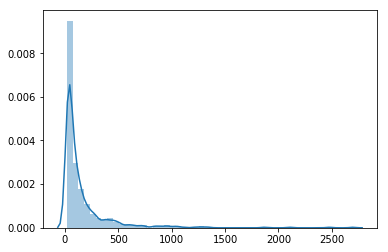

In [11]:
sns.distplot(users.values)
# Power law distribution 멱함수 분포

### 사람들이 많이 보는 영화?

In [12]:
films = ratings.groupby('movieId')['movieId'].count()

In [13]:
films.sort_values(ascending=False).head()

movieId
356     329
318     317
296     307
593     279
2571    278
Name: movieId, dtype: int64

In [14]:
movies = pd.read_csv('./data/ml-latest-small/movies.csv', index_col='movieId')

In [15]:
movies.loc[[356, 318, 296, 593, 2571]]

,title,genres
movieId,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War
318,"Shawshank Redemption, The (1994)",Crime|Drama
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller


### 특정영화 평점보기

In [28]:
movies[movies.title.apply(func = lambda x: 'Frozen' in x)]

,title,genres
movieId,,
60943,Frozen River (2008),Drama
75395,Frozen (2010),Drama|Horror|Thriller
100553,Frozen Planet (2011),Documentary
106696,Frozen (2013),Adventure|Animation|Comedy|Fantasy|Musical|Rom...


In [17]:
movies[movies.title=='Frozen (2013)']

,title,genres
movieId,,
106696,Frozen (2013),Adventure|Animation|Comedy|Fantasy|Musical|Rom...


In [18]:
movies.index[movies.title=='Frozen (2013)']

Int64Index([106696], dtype='int64', name='movieId')

In [19]:
movies.index[movies.title=='Frozen (2013)'][0]

106696

In [29]:
ratings_of_frozen = ratings[ratings.movieId == movies.index[movies.title=='Frozen (2013)'][0]] # Frozen 에 대한 ratings

In [31]:
len(ratings_of_frozen)

29

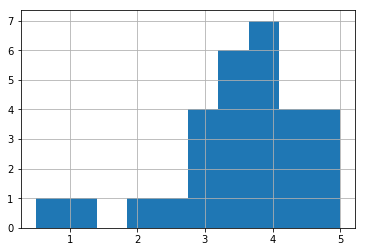

In [32]:
ratings_of_frozen['rating'].hist()

* 1점 준 user에 대해 분석해보자.

In [34]:
ratings_of_frozen

,userId,movieId,rating,timestamp
1245,10,106696,4.5,1455306204
3572,21,106696,4.0,1403460685
9418,63,106696,5.0,1443461176
16798,105,106696,3.5,1447563589
21852,141,106696,3.0,1513129988
21967,143,106696,4.0,1444768621
22567,153,106696,2.5,1525552648
23219,159,106696,3.0,1508640298
25783,177,106696,5.0,1435529765
35769,241,106696,4.0,1447540037


In [48]:
print(int(ratings_of_frozen[ratings_of_frozen.rating == 1]['userId']))

517


In [52]:
ratings.loc[ratings['userId'] == int(ratings_of_frozen[ratings_of_frozen.rating == 1]['userId'])]

,userId,movieId,rating,timestamp
81531,517,1,4.0,1487954343
81532,517,2,3.0,1487954340
81533,517,10,0.5,1487957717
81534,517,17,0.5,1487953834
81535,517,34,5.0,1487954303
81536,517,47,2.0,1487958109
81537,517,107,1.0,1487956132
81538,517,110,1.5,1487953160
81539,517,158,2.0,1487954337
81540,517,165,2.5,1487957639


In [53]:
ratings.loc[ratings['userId'] == int(ratings_of_frozen[ratings_of_frozen.rating == 1]['userId']), 'rating']

81531    4.0
81532    3.0
81533    0.5
81534    0.5
81535    5.0
81536    2.0
81537    1.0
81538    1.5
81539    2.0
81540    2.5
81541    3.5
81542    1.0
81543    5.0
81544    4.0
81545    2.5
81546    2.5
81547    2.0
81548    3.5
81549    5.0
81550    3.5
81551    4.5
81552    3.0
81553    3.0
81554    3.0
81555    1.0
81556    1.5
81557    2.5
81558    1.0
81559    1.0
81560    5.0
        ... 
81901    3.0
81902    3.0
81903    2.0
81904    1.0
81905    1.0
81906    0.5
81907    3.0
81908    3.0
81909    2.0
81910    1.0
81911    4.0
81912    1.0
81913    4.0
81914    3.0
81915    2.5
81916    2.5
81917    3.5
81918    1.0
81919    5.0
81920    3.0
81921    0.5
81922    1.0
81923    1.0
81924    1.0
81925    3.0
81926    2.5
81927    1.0
81928    1.0
81929    2.5
81930    1.0
Name: rating, Length: 400, dtype: float64

* 전체 rating에 비해

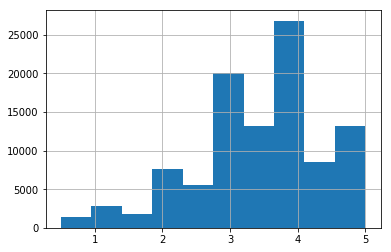

In [59]:
ratings['rating'].hist()

* 애초에 짜게 점수 주는 사람인 것을 확인할 수 있음.

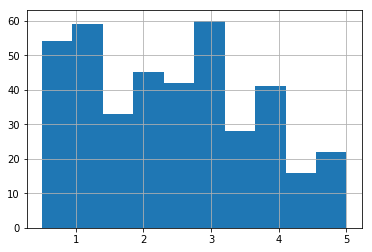

In [57]:
ratings.loc[ratings['userId'] == int(ratings_of_frozen[ratings_of_frozen.rating == 1]['userId']), 'rating'].hist() #